In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [85]:
health_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
health_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
print('----------Dataset Shape----------')
print('No of Rows: ', health_df.shape[0],'| No of Columns: ',health_df.shape[1])
print('Columns:', health_df.columns.tolist())
print('---------------------------------')
print('----Column-wise unique values----')
cols = ['gender','hypertension','ever_married','work_type','Residence_type','smoking_status','stroke','heart_disease']
for i in range(len(cols)):
  print(cols[i],": ",health_df[cols[i]].unique().tolist())
print('---------------------------------')
print('-----Column-wise Nulls Dtype-----')
print(health_df.info())
print('---------------------------------')
print("No of Null values in column \'bmi':",health_df.bmi.isna().sum())
print("Percentage of missing values in bmi: ", round(100 * health_df['bmi'].isna().sum()/health_df['bmi'].count(),2),"%")

----------Dataset Shape----------
No of Rows:  5110 | No of Columns:  12
Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
---------------------------------
----Column-wise unique values----
gender :  ['Male', 'Female', 'Other']
hypertension :  [0, 1]
ever_married :  ['Yes', 'No']
work_type :  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type :  ['Urban', 'Rural']
smoking_status :  ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
stroke :  [1, 0]
heart_disease :  [1, 0]
---------------------------------
-----Column-wise Nulls Dtype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   objec

In [87]:
# Drop column 'id', since I wont use it
health_df.drop('id', axis=1, inplace = True)

# Reset index of dataframe
health_df = health_df.reset_index(drop = True)

In [88]:
# Printing unique value counts
def unique_col_counts(health_df, columns):
  for i in range(len(columns)):
    print(health_df[columns[i]].value_counts(),"\n")

columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
unique_col_counts(health_df, columns)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64 

0    4612
1     498
Name: hypertension, dtype: int64 

0    4834
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1757
Name: ever_married, dtype: int64 

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64 

0    4861
1     249
Name: stroke, dtype: int64 



In [89]:
# Let's delete the 'other' value on gender, as there is only one and it wont affect our analysis

# Display row with 'gender' is 'Other'
display(health_df[health_df['gender'] == 'Other'])

# Drop row
health_df.drop(health_df.index[health_df['gender'] == 'Other'], inplace=True)

# Reset index of dataframe
health_df = health_df.reset_index(drop = True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [90]:
# Replacing the binary values with 1s and 0s
health_df.gender.replace({'Male':1,'Female':0},inplace = True)
health_df.ever_married.replace({'Yes':1,'No':0},inplace = True)
health_df.Residence_type.replace({'Urban':1,'Rural':0},inplace = True)

In [91]:
health_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,Private,1,83.75,NaN,never smoked,0
5105,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5106,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5107,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


Text(0.5, 1.0, 'Smoking Status')

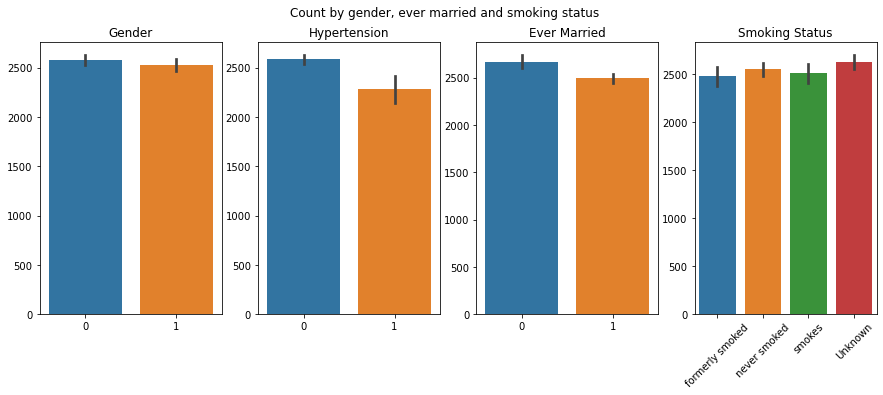

In [92]:
gender = health_df['gender']
hypertension = health_df['hypertension']
ever_married = health_df['ever_married']
smoking_status = health_df['smoking_status']

fig, axes = plt.subplots(1, 4, figsize = (15, 5), sharey=False)
fig.suptitle('Count by gender, ever married and smoking status')
plt.xticks(rotation=45)

# Gender
sns. barplot(ax=axes[0], x=gender.values, y=gender.index)
axes[0].set_title('Gender')

# Hypertension
sns. barplot(ax=axes[1], x=hypertension.values, y=hypertension.index)
axes[1].set_title('Hypertension')

# Ever Married
sns. barplot(ax=axes[2], x=ever_married.values, y=ever_married.index)
axes[2].set_title('Ever Married')

# Smoking Status
sns. barplot(ax=axes[3], x=smoking_status.values, y=smoking_status.index)
axes[3].set_title('Smoking Status')

In [93]:
# Creating other dummy variables
health_df = pd.get_dummies(health_df, columns = ['work_type','smoking_status'])

In [94]:
health_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,NaN,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0,80.0,1,0,1,1,83.75,NaN,0,0,0,1,0,0,0,0,1,0
5105,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5106,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5107,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [95]:
# Listing the columns names, as we'll need this later when we're converting
# the data back to a DF in the following cell

cols = ['gender','age','hypertension','heart_disease','ever_married','Residence_type',
        'avg_glucose_level','bmi','stroke','work_type_Govt_job','work_type_Never_worked',
        'work_type_Private','work_type_Self-employed','work_type_children',
        'smoking_status_Unknown','smoking_status_formerly_smoked',
        'smoking_status_never_smoked','smoking_status_smokes']

In [96]:
# Dealing with missing values

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.NaN, strategy='median')
imp = imp.fit(health_df)
health_df = imp.transform(health_df)

In [97]:
health_df = pd.DataFrame(health_df, columns = cols)

In [98]:
health_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,61.0,0.0,0.0,1.0,0.0,202.21,28.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,80.0,1.0,0.0,1.0,1.0,83.75,28.1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5105,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5107,1.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


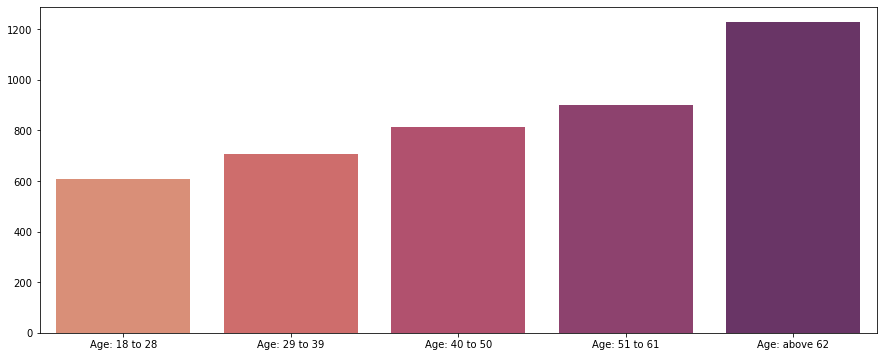

In [99]:
Age_18_28 = health_df.age[(health_df.age >= 18)& (health_df.age<=28)]
Age_29_39 = health_df.age[(health_df.age >= 29)& (health_df.age<=39)]
Age_40_50 = health_df.age[(health_df.age >= 40)& (health_df.age<=50)]
Age_51_61 = health_df.age[(health_df.age >= 51)& (health_df.age<=61)]
Age_above_62 = health_df.age[health_df.age >= 62]

agex = ['Age: 18 to 28','Age: 29 to 39','Age: 40 to 50','Age: 51 to 61','Age: above 62']
agey = [len(Age_18_28.values),len(Age_29_39.values),len(Age_40_50.values),len(Age_51_61.values),len(Age_above_62.values)]

plt.figure(figsize=(15,6))
sns.barplot(x = agex,y = agey , palette='flare')
plt.title = (" Range of age ")
plt.xlable = (" Range of age ")
plt.ylabel = ('No of Customers')
plt.show()

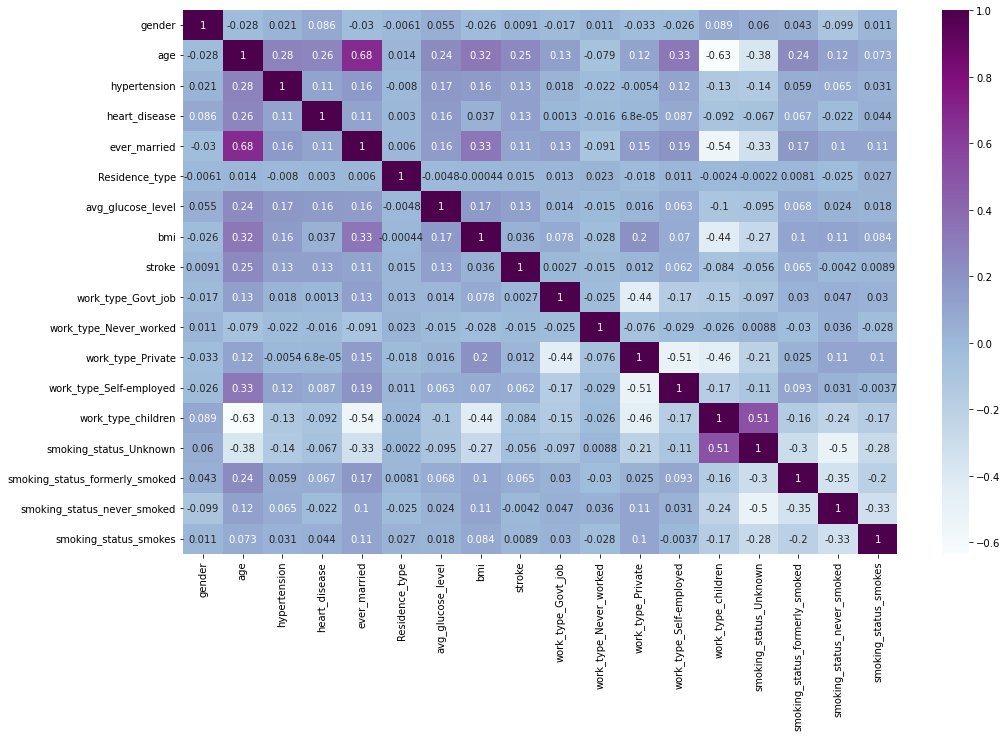

In [100]:
plt.figure(figsize = (16,10))
sns.heatmap(health_df.corr(),annot = True,cmap='BuPu')
plt.show()

In [101]:
health_df['age'] = health_df['age'].astype(int)

In [102]:
X = health_df[['age', 'hypertension','heart_disease','ever_married','avg_glucose_level']]
y = health_df['stroke']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [104]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [105]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9471624266144814
